This is me following an online tutorial from here: https://colab.research.google.com/drive/1B7gFBSr0eoZ5IbsA0lY8q3XL8n-3BOn4#scrollTo=sOFhBVx_fQcY


# Basic

In [1]:
# Needed to do this first

#conda install -c conda-forge xarray dask netCDF4 bottleneck

In [2]:
# Dont think I need to do this anymore

#pip install xarray

In [3]:
import glob
import matplotlib.pyplot as plt
import urllib.request
import xarray as xr

C:\Users\danho\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\xarray\backends\cfgrib_.py:29: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [4]:
ds2011 = xr.open_dataset('precip.V1.0.2011.nc')
ds2012 = xr.open_dataset('precip.V1.0.2012.nc')

C:\Users\danho\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\xarray\backends\plugins.py:64: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [5]:
ds2011

<xarray.Dataset>
Dimensions:  (lat: 120, lon: 300, time: 365)
Coordinates:
  * lat      (lat) float32 20.12 20.38 20.62 20.88 ... 49.12 49.38 49.62 49.88
  * lon      (lon) float32 230.1 230.4 230.6 230.9 ... 304.1 304.4 304.6 304.9
  * time     (time) datetime64[ns] 2011-01-01 2011-01-02 ... 2011-12-31
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    title:          CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    Conventions:    COARDS
    description:    Gridded daily Precipitation
    platform:       Observations
    Comments:       Preciptation is accumulated from 12z of previous day to 1...
    history:        originally created RT starting 04/2010 by CAS from data o...
    dataset_title:  CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    References:     http://www.psl.noaa.gov/data/gridded/data.unified.daily.c...

In [6]:
ds2011_2012 = xr.concat([ds2011,ds2012], dim='time')

In [7]:
ds2011_2012

<xarray.Dataset>
Dimensions:  (lat: 120, lon: 300, time: 731)
Coordinates:
  * lat      (lat) float32 20.12 20.38 20.62 20.88 ... 49.12 49.38 49.62 49.88
  * lon      (lon) float32 230.1 230.4 230.6 230.9 ... 304.1 304.4 304.6 304.9
  * time     (time) datetime64[ns] 2011-01-01 2011-01-02 ... 2012-12-31
Data variables:
    precip   (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    title:          CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    Conventions:    COARDS
    description:    Gridded daily Precipitation
    platform:       Observations
    Comments:       Preciptation is accumulated from 12z of previous day to 1...
    history:        originally created RT starting 04/2010 by CAS from data o...
    dataset_title:  CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    References:     http://www.psl.noaa.gov/data/gridded/data.unified.daily.c...

In [8]:
ds2011_2014 = xr.open_mfdataset('precip.V1.0.*.nc', concat_dim='time', combine='nested')

In [9]:
ds2011_2014

<xarray.Dataset>
Dimensions:  (lat: 120, lon: 300, time: 1461)
Coordinates:
  * lat      (lat) float32 20.12 20.38 20.62 20.88 ... 49.12 49.38 49.62 49.88
  * lon      (lon) float32 230.1 230.4 230.6 230.9 ... 304.1 304.4 304.6 304.9
  * time     (time) datetime64[ns] 2011-01-01 2011-01-02 ... 2014-12-31
Data variables:
    precip   (time, lat, lon) float32 dask.array<chunksize=(365, 120, 300), meta=np.ndarray>
Attributes:
    title:          CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    Conventions:    COARDS
    description:    Gridded daily Precipitation
    platform:       Observations
    Comments:       Preciptation is accumulated from 12z of previous day to 1...
    history:        originally created RT starting 04/2010 by CAS from data o...
    dataset_title:  CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    References:     http://www.psl.noaa.gov/data/gridded/data.unified.daily.c...

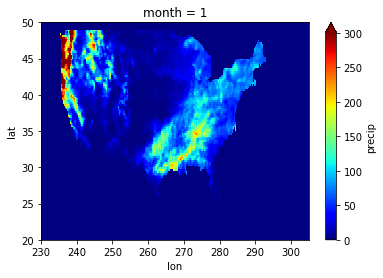

In [10]:
ds2012_mon = ds2012.groupby('time.month').sum()
ds2012_mon.precip[0,:,:].plot(cmap='jet', vmax=300)

In [11]:
import calendar

In [12]:
landmask = ds2012.precip.sum(dim='time')>0

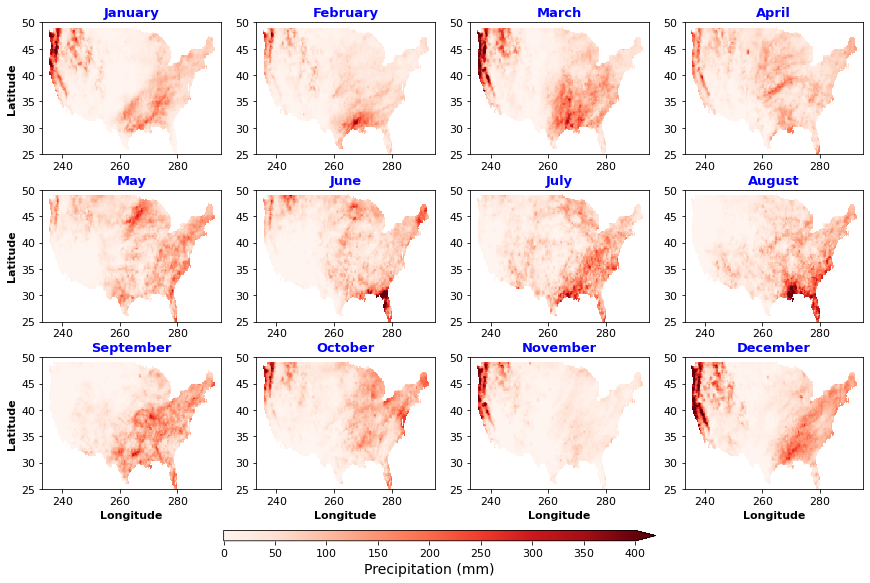

In [13]:
fig = plt.figure(figsize=[12,8], facecolor='w')
plt.subplots_adjust(bottom=0.15, top=0.96, left=0.04, right=0.99, 
                    wspace=0.2, hspace=0.27) # wspace and hspace adjust the horizontal and vertical spaces, respectively.
nrows = 3
ncols = 4
for i in range(1, 13):
    plt.subplot(nrows, ncols, i)
    dataplot = ds2012_mon.precip[i-1, :, :].where(landmask) # Remember that in Python, the data index starts at 0, but the subplot index start at 1.
    p = plt.pcolormesh(ds2012_mon.lon, ds2012_mon.lat, dataplot,
                   vmax = 400, vmin = 0, cmap = 'Reds',
                   ) 
    plt.xlim([233,295])
    plt.ylim([25,50])
    plt.title(calendar.month_name[dataplot.month.values], fontsize = 13, 
              fontweight = 'bold', color = 'b')
    plt.xticks(fontsize = 11)
    plt.yticks(fontsize = 11)
    if i % ncols == 1: # Add ylabel for the very left subplots
        plt.ylabel('Latitude', fontsize = 11, fontweight = 'bold')
    if i > ncols*(nrows-1): # Add xlabel for the bottom row subplots
        plt.xlabel('Longitude', fontsize = 11, fontweight = 'bold')

# Add a colorbar at the bottom:
cax = fig.add_axes([0.25, 0.06, 0.5, 0.018])
cb = plt.colorbar(cax=cax, orientation='horizontal', extend = 'max',)
cb.ax.tick_params(labelsize=11)
cb.set_label(label='Precipitation (mm)', color = 'k', size=14)

# Now we can save a high resolution (300dpi) version of the figure:
plt.savefig('Fig_prec_cpc_mon_2012.png', format = 'png', dpi = 300)

In [14]:
top = 40
bottom = 37
left = 258
right = 265.4

In [15]:
ds_sel = ds2011_2014.isel(lon=(ds2011_2014.lon >= left) & (ds2011_2014.lon <= right),
                          lat=(ds2011_2014.lat >= bottom) & (ds2011_2014.lat <= top),
                          )
ds_sel_avg = ds_sel.mean(dim=['lat','lon'])

In [16]:
ds_sel_avg_noleap = ds_sel_avg.sel(
    time=~((ds_sel_avg.time.dt.month == 2) & (ds_sel_avg.time.dt.day == 29)))

In [17]:
ds_sel_avg_noleap

<xarray.Dataset>
Dimensions:  (time: 1460)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-01-02 ... 2014-12-31
Data variables:
    precip   (time) float32 dask.array<chunksize=(365,), meta=np.ndarray>

In [18]:
ds_sel_avg_noleap.to_netcdf('ds_prec_Kansas_noleap_2011_2014.nc')

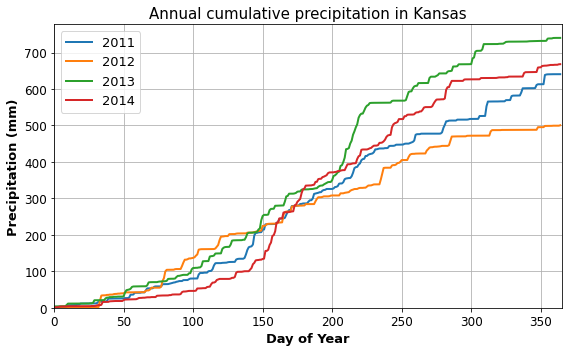

In [19]:
fig = plt.figure(figsize=[8,5], facecolor='w')
for yr in range(2011,2015):
    da_yr = ds_sel_avg_noleap.isel(time = ds_sel_avg_noleap.time.dt.year==yr).precip
    dataplot = da_yr.cumsum()
    plt.plot(dataplot, linewidth=2, label = yr)
plt.legend(fontsize=13)
plt.grid()
plt.xticks(fontsize=12) # we can also change the ticks to be on Jan-1, Feb-1, etc. but I'll skip it for here.
plt.yticks(fontsize=12)
plt.ylabel('Precipitation (mm)', fontsize = 13, fontweight = 'bold')
plt.xlabel('Day of Year', fontsize = 13, fontweight = 'bold')
plt.xlim([0,365])
plt.ylim(bottom=0)
plt.title('Annual cumulative precipitation in Kansas', fontsize=15)
plt.tight_layout()
plt.savefig('Fig_cumsum_prec_Kansas.png', format = 'png', dpi = 300)

# Intermediate

In [20]:
import urllib.request
import xarray as xr
import matplotlib.pyplot as plt
import datetime
import pandas as pd

In [21]:
# Now lets open the two datasets and explore them:
ds_gridmet = xr.open_dataset('tmin_gridmet_2021.nc')
ds_CPC = xr.open_dataset('tmin.2021.nc')

In [22]:
ds_gridmet

<xarray.Dataset>
Dimensions:          (lon: 1386, lat: 585, day: 365, crs: 1)
Coordinates:
  * lon              (lon) float64 -124.8 -124.7 -124.7 ... -67.14 -67.1 -67.06
  * lat              (lat) float64 49.4 49.36 49.32 49.28 ... 25.15 25.11 25.07
  * day              (day) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-12-31
  * crs              (crs) uint16 3
Data variables:
    air_temperature  (day, lat, lon) float32 ...
Attributes: (12/19)
    geospatial_bounds_crs:      EPSG:4326
    Conventions:                CF-1.6
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_lat_min:         25.066666666666666
    geospatial_lat_max:         49.40000000000000
    geospatial_lon_min:         -124.7666666333333
    ...                         ...
    date:                       03 March 2022
    note1:                      The projection information for this file is: ...
    note2:                      Citation: Abatzoglou, J.T., 2013, Development...
    note3:                      Data in slices after last_permanent_slice (1-...
    note4:                      Data in slices after last_provisional_slice (...
    note5:                      Days correspond approximately to calendar day...

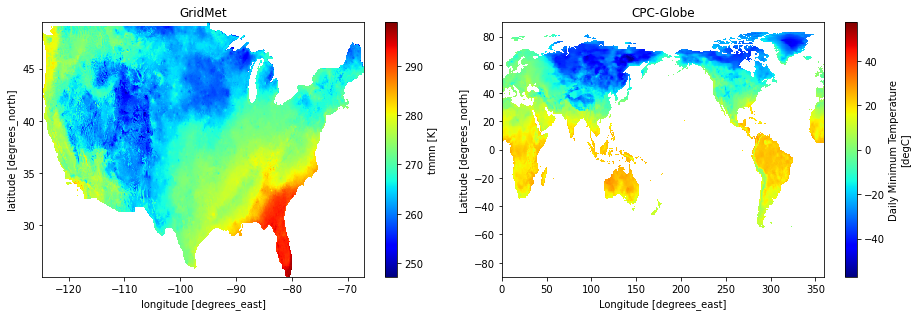

In [23]:
fig = plt.figure(figsize = [13,4.5])
plt.subplot(1,2,1)
ds_gridmet.air_temperature[0,:,:].plot(cmap = 'jet')
plt.title('GridMet')
plt.subplot(1,2,2)
ds_CPC.tmin[0,:,:].plot(cmap = 'jet')
plt.title('CPC-Globe')
plt.tight_layout()

In [24]:
ds_gridmet_revised = ds_gridmet.drop('crs').rename({'day':'time', 'air_temperature':'tmin'})
ds_gridmet_revised = ds_gridmet_revised-273.15 # Convert Kelvin to Celcius
lon_revised = ds_gridmet.lon + (ds_gridmet.lon < 0)*360
ds_gridmet_revised = ds_gridmet_revised.assign_coords(lon = lon_revised)

In [25]:
ds_CPC_interp = ds_CPC.interp(lat = ds_gridmet_revised.lat, lon = ds_gridmet_revised.lon)

In [26]:
ds_gridmet_revised = ds_gridmet_revised.assign_coords(
    time = pd.to_datetime(ds_gridmet_revised.time))
ds_CPC_interp = ds_CPC_interp.assign_coords(
    time = pd.to_datetime(ds_CPC_interp.time))

In [27]:
target_date = datetime.date(2021,2,16)
target_date = pd.to_datetime(target_date)

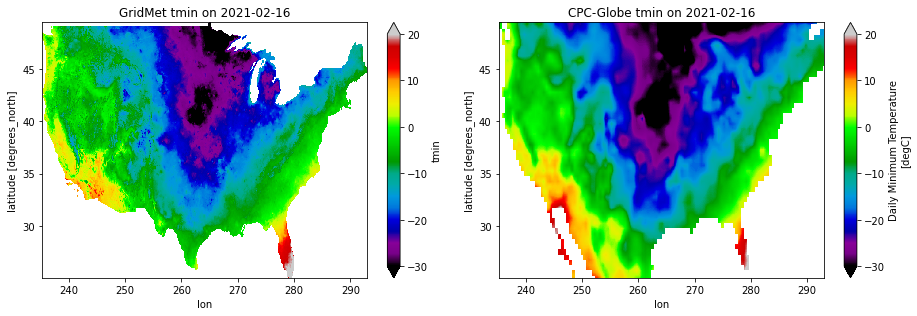

In [28]:
fig = plt.figure(figsize = [13,4.5], facecolor='w')
plt.subplot(1,2,1)
ds_gridmet_revised.sel(time=target_date).tmin.plot(cmap = 'nipy_spectral', vmin = -30, vmax = 20)
plt.title(f'GridMet tmin on {target_date.strftime("%Y-%m-%d")}')

plt.subplot(1,2,2)
ds_CPC_interp.sel(time=target_date).tmin.plot(cmap = 'nipy_spectral', vmin = -30, vmax = 20)
plt.title(f'CPC-Globe tmin on {target_date.strftime("%Y-%m-%d")}')
plt.tight_layout()

In [29]:
# Rough boundaries for Austin, TX:
left = 360 - 97.9
right = 360 - 97.6
top = 30.5
bottom = 30.2

In [30]:
ds_Austin_gridmet = ds_gridmet_revised.isel(
    lon=(ds_gridmet_revised.lon >= left) & (ds_gridmet_revised.lon <= right),
    lat=(ds_gridmet_revised.lat >= bottom) & (ds_gridmet_revised.lat <= top),
).mean(dim=['lat','lon'])
ds_Austin_CPC = ds_CPC_interp.isel(
    lon=(ds_CPC_interp.lon >= left) & (ds_CPC_interp.lon <= right),
    lat=(ds_CPC_interp.lat >= bottom) & (ds_CPC_interp.lat <= top),
).mean(dim=['lat','lon'])

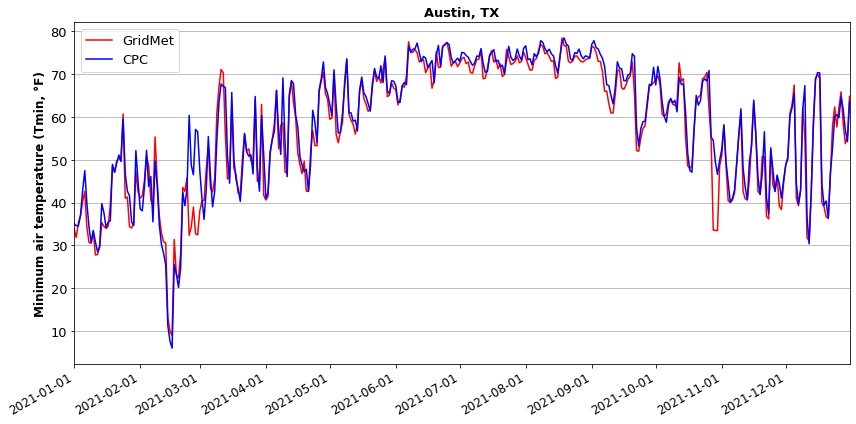

In [31]:
plt.figure(figsize = [12,6])
(ds_Austin_gridmet.tmin*1.8 + 32).plot(label = 'GridMet', color = 'r')
(ds_Austin_CPC.tmin*1.8 + 32).plot(label = 'CPC', color = 'b')
plt.grid(axis='y')
plt.xticks(ticks = [datetime.date(2021,x,1) for x in range(1,13)], fontsize=12)
plt.xlim([datetime.date(2021,1,1), datetime.date(2021,12,31)])
plt.yticks(fontsize=13)
plt.ylabel('Minimum air temperature (Tmin, °F)', fontsize = 12, 
           fontweight = 'bold')
plt.xlabel('')
plt.legend(fontsize=13, loc = 'upper left')
plt.title('Austin, TX', fontsize=13, fontweight = 'bold')
plt.tight_layout()

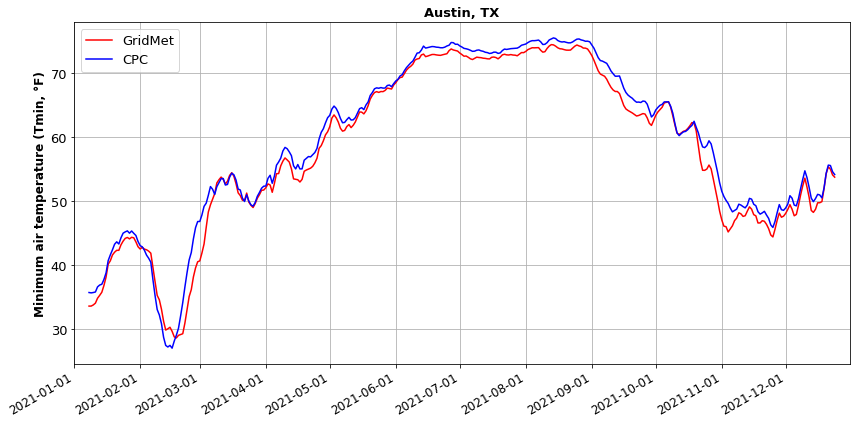

In [32]:
plt.figure(figsize = [12,6])
(ds_Austin_gridmet.tmin*1.8 + 32).rolling(time=15,center=True).mean().plot(label = 'GridMet', color = 'r')
(ds_Austin_CPC.tmin*1.8 + 32).rolling(time=15,center=True).mean().plot(label = 'CPC', color = 'b')
plt.grid()
plt.xticks(ticks = [datetime.date(2021,x,1) for x in range(1,13)], fontsize=12)
plt.xlim([datetime.date(2021,1,1), datetime.date(2021,12,31)])
plt.yticks(fontsize=13)
plt.ylabel('Minimum air temperature (Tmin, °F)', fontsize = 12, 
           fontweight = 'bold')
plt.xlabel('')
plt.legend(fontsize=13, loc = 'upper left')
plt.title('Austin, TX', fontsize=13, fontweight = 'bold')
plt.tight_layout()

# Advanced

In [33]:
import xarray as xr
import matplotlib.pyplot as plt
import datetime
import pandas as pd

In [34]:
url = 'http://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.GFDL-SPEAR/.FORECAST/.MONTHLY/.tref/dods'

ds = xr.open_dataset(url,engine='netcdf4',decode_times=False)

ds

<xarray.Dataset>
Dimensions:  (S: 21, M: 30, X: 360, L: 12, Y: 181, Z: 1)
Coordinates:
  * S        (S) float32 731.0 732.0 733.0 734.0 ... 748.0 749.0 750.0 751.0
  * M        (M) float32 1.0 2.0 3.0 4.0 5.0 6.0 ... 26.0 27.0 28.0 29.0 30.0
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * L        (L) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * Z        (Z) float32 2.0
Data variables:
    tref     (S, L, M, Z, Y, X) float32 ...
Attributes:
    Conventions:  IRIDL

In [35]:
ds = ds.rename({'S':'time', 'X':'lon', 'Y':'lat'})

In [36]:
start_date_NMME = pd.to_datetime(datetime.date(1960,1,1))

time_new = [start_date_NMME + pd.DateOffset(months = x) for x in ds.time.values]
ds = ds.assign_coords(time = time_new)
if 'Z' in ds.dims:
    ds = ds.squeeze(dim = 'Z').drop('Z')
    
ds

<xarray.Dataset>
Dimensions:  (time: 21, M: 30, lon: 360, L: 12, lat: 181)
Coordinates:
  * time     (time) datetime64[ns] 2020-12-01 2021-01-01 ... 2022-08-01
  * M        (M) float32 1.0 2.0 3.0 4.0 5.0 6.0 ... 26.0 27.0 28.0 29.0 30.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * L        (L) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Data variables:
    tref     (time, L, M, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL

In [37]:
target_date = pd.to_datetime(datetime.date(2021,2,1))
ds_sel = ds.sel(time=target_date).isel(L=0) 
ds_sel.load()

<xarray.Dataset>
Dimensions:  (M: 30, lon: 360, lat: 181)
Coordinates:
    time     datetime64[ns] 2021-02-01
  * M        (M) float32 1.0 2.0 3.0 4.0 5.0 6.0 ... 26.0 27.0 28.0 29.0 30.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
    L        float32 0.5
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Data variables:
    tref     (M, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    Conventions:  IRIDL

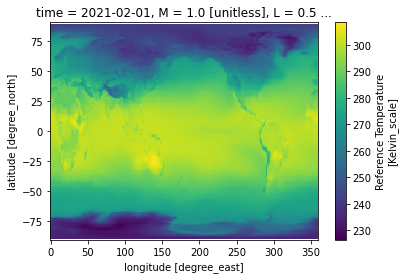

In [38]:
ds_sel.tref[0,:,:].plot()

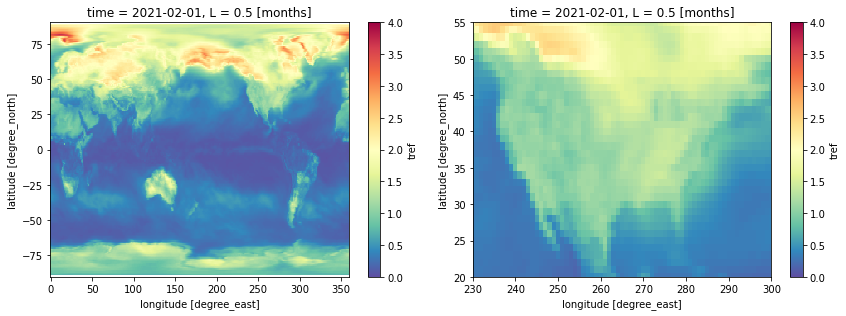

In [39]:
ds_std = ds_sel.std(dim='M')

plt.figure(figsize=[12,4.5])
plt.subplot(1,2,1)
ds_std.tref.plot(cmap = 'Spectral_r', vmin = 0, vmax = 4)
plt.subplot(1,2,2)
ds_std.tref.plot(cmap = 'Spectral_r', vmin = 0, vmax = 4)
plt.xlim([230,300])
plt.ylim([20,55])
plt.tight_layout()


In [40]:
# Why is all the data in the below example different from the tutorial?

ds_clim = xr.open_dataset('http://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.GFDL-SPEAR/.HINDCAST/.mc9120/.tref/dods',
                          decode_times=False)

ds_clim.load()

<xarray.Dataset>
Dimensions:  (S: 12, X: 360, L: 12, Y: 181)
Coordinates:
  * S        (S) float32 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * L        (L) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Data variables:
    tref     (S, L, Y, X) float64 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    Conventions:  IRIDL

In [41]:
ds_clim = ds_clim.rename({'X':'lon', 'Y':'lat'})

ds_clim_sel = ds_clim.isel(L = 0).sel(S = 1).drop(['S','L'])

ds_anom = ds_sel - ds_clim_sel

(20.0, 55.0)

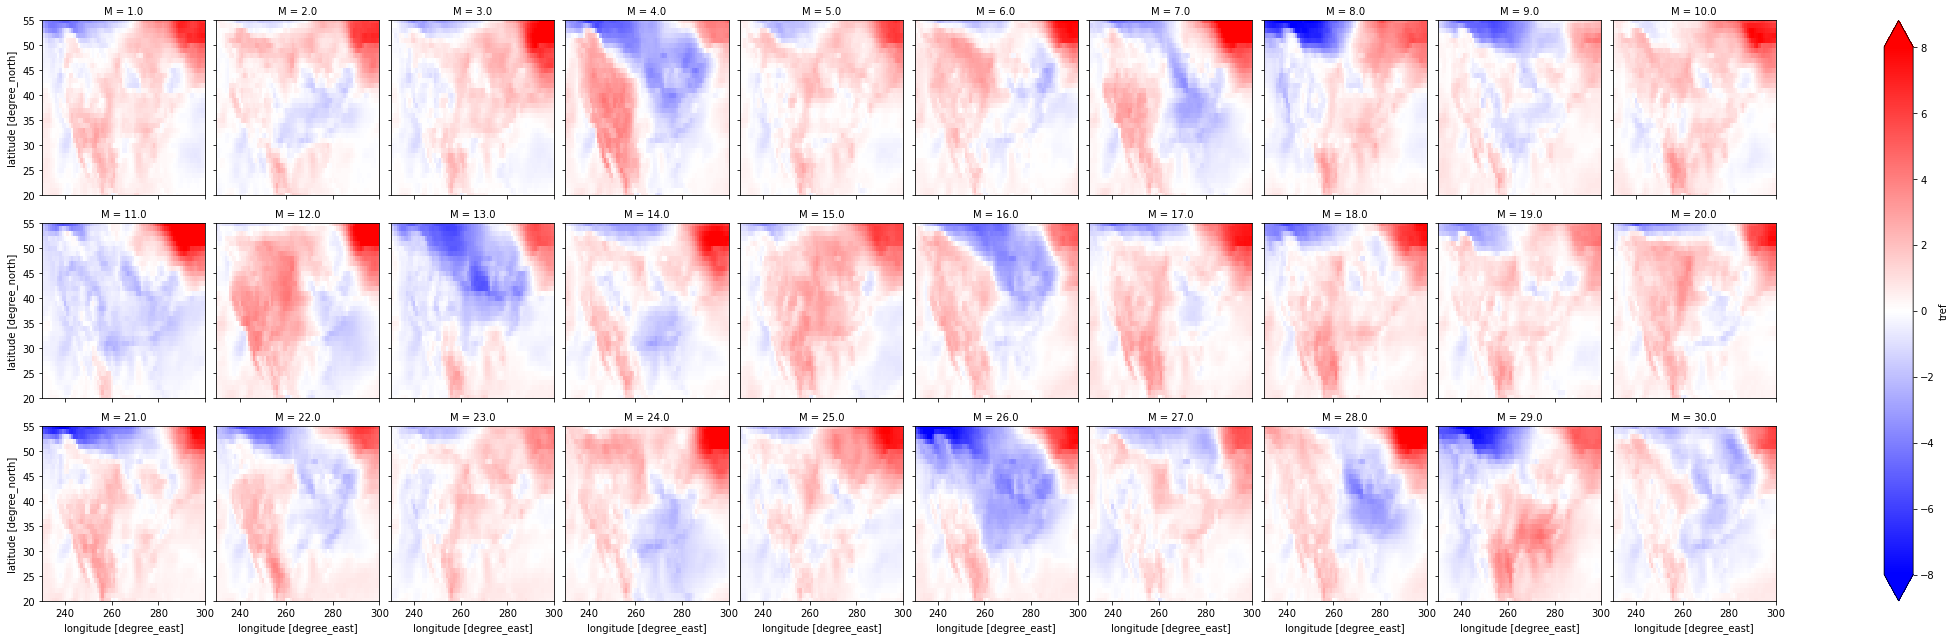

In [42]:
ds_anom.tref.plot(col = 'M', col_wrap = 10, vmin = -8, vmax = 8, cmap = 'bwr')
plt.xlim([230,300])
plt.ylim([20,55])

(20.0, 55.0)

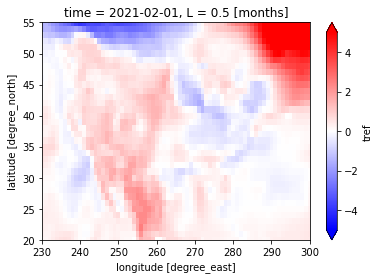

In [43]:
ds_anom.mean(dim='M').tref.plot(cmap='bwr', vmax=5, vmin=-5)
plt.xlim([230,300])
plt.ylim([20,55])

In [44]:
pip install gcsfs

Note: you may need to restart the kernel to use updated packages.


In [45]:
from matplotlib import pyplot as plt
import pandas as pd
import xarray as xr
import gcsfs
import datetime
import os

In [46]:
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')

df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706


In [47]:
len(df)

523774

In [48]:
df_ssp585 = df.query("activity_id=='ScenarioMIP' & table_id == 'Amon' & " +\
    "variable_id == 'tas' & experiment_id == 'ssp585' & member_id == 'r1i1p1f1'")
print('Length of df_ssp585:', len(df_ssp585))
df_ssp585.head(3)

Length of df_ssp585: 35


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
866,ScenarioMIP,NOAA-GFDL,GFDL-CM4,ssp585,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-CM...,NaN,20180701
19008,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp585,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701
66586,ScenarioMIP,BCC,BCC-CSM2-MR,ssp585,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/BCC/BCC-CSM2-MR/s...,NaN,20190314


In [49]:
df_historical = df.query("activity_id == 'CMIP' & table_id == 'Amon' & " +\
    "variable_id == 'tas' & experiment_id == 'historical' & member_id == 'r1i1p1f1'")
print('Length of df_historical:', len(df_historical))
df_historical.head(3)

Length of df_historical: 55


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
8074,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/histo...,NaN,20180701
29231,CMIP,IPSL,IPSL-CM6A-LR,historical,r1i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/histor...,NaN,20180803
32351,CMIP,NASA-GISS,GISS-E2-1-G,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/hi...,NaN,20180827


In [50]:
model = 'GFDL-CM4'
zstore_hist = df_historical.query(f"source_id == '{model}'").zstore.values[0]
zstore_ssp585 = df_ssp585.query(f"source_id == '{model}'").zstore.values[0]
gcs = gcsfs.GCSFileSystem(token='anon')

In [51]:
#conda install -c conda-forge zarr

import zarr

!pip install xarray[complete]

mapper = gcs.get_mapper(zstore_hist)
ds_hist = xr.open_zarr(mapper, consolidated = True)
mapper = gcs.get_mapper(zstore_ssp585)
ds_ssp585 = xr.open_zarr(mapper, consolidated = True)

In [52]:
conda install -c conda-forge zarr

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [53]:
print('hist date range  :', ds_hist.time[0].values, ' , ', ds_hist.time[-1].values)
print('ssp585 date range:', ds_ssp585.time[0].values, ' , ', ds_ssp585.time[-1].values)

hist date range  : 1850-01-16 12:00:00  ,  2014-12-16 12:00:00
ssp585 date range: 2015-01-16 12:00:00  ,  2100-12-16 12:00:00


In [54]:
start_time = pd.to_datetime(datetime.date(1850,1,15))
time_new_hist = [start_time + pd.DateOffset(months = x) for x in range(len(ds_hist.time))]

start_time = pd.to_datetime(datetime.date(2015,1,15))
time_new_ssp585 = [start_time + pd.DateOffset(months = x) for x in range(len(ds_ssp585.time))]

ds_hist = ds_hist.assign_coords(time = time_new_hist)
ds_ssp585 = ds_ssp585.assign_coords(time = time_new_ssp585)

start_date = pd.to_datetime(datetime.date(1980,1,1))
end_date = pd.to_datetime(datetime.date(2010,12,31))
ds_hist_sel = ds_hist.isel(time=(ds_hist.time >= start_date) & (ds_hist.time <= end_date))

start_date = pd.to_datetime(datetime.date(2070,1,1))
end_date = pd.to_datetime(datetime.date(2099,12,31))
ds_ssp585_sel = ds_ssp585.isel(time=(ds_ssp585.time >= start_date) & (ds_ssp585.time <= end_date))

ds_hist_sel.load()
ds_ssp585_sel.load()

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 180, lon: 288, time: 360)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
    height     float64 2.0
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bnds   (lat, bnds) float64 -90.0 -89.0 -89.0 -88.0 ... 89.0 89.0 90.0
  * lon        (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
    lon_bnds   (lon, bnds) float64 0.0 1.25 1.25 2.5 ... 357.5 358.8 358.8 360.0
  * time       (time) datetime64[ns] 2070-01-15 2070-02-15 ... 2099-12-15
    time_bnds  (time, bnds) object 2070-01-01 00:00:00 ... 2100-01-01 00:00:00
Data variables:
    tas        (time, lat, lon) float32 242.4 242.4 242.4 ... 269.6 269.6 269.6
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  60225.0
    comment:                <null ref>
    ...                     ...
    variable_id:            tas
    variant_info:           N/A
    variant_label:          r1i1p1f1
    status:                 2019-08-13;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/991bc4a4-20d5-4a58-a451-6b3ea33116be
    version_id:             v20180701

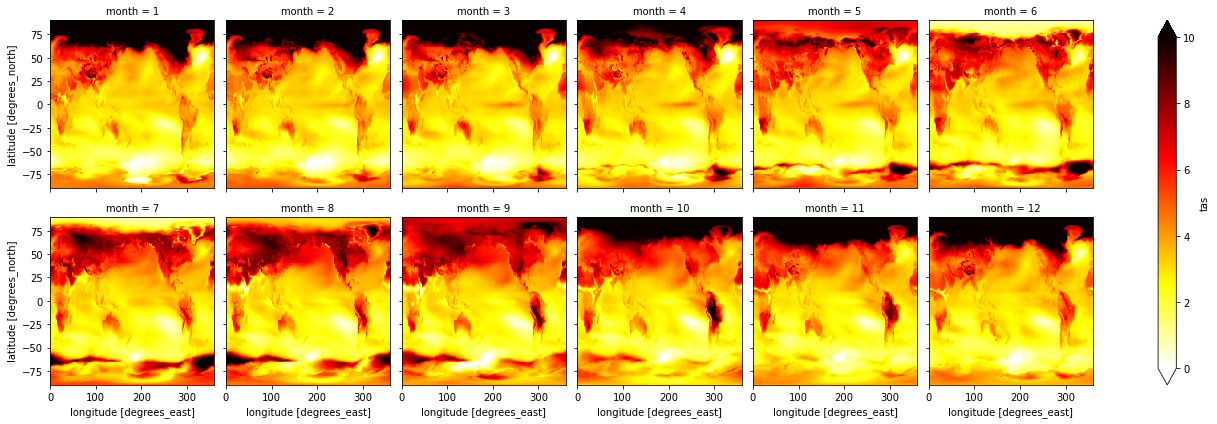

In [55]:
tas_avg_hist = ds_hist_sel.groupby('time.month').mean()
tas_avg_ssp585 = ds_ssp585_sel.groupby('time.month').mean()
tas_30yr_diff = tas_avg_ssp585 - tas_avg_hist
tas_30yr_diff.tas.plot(col = 'month', col_wrap = 6, vmax = 10, vmin = 0, cmap = 'hot_r')


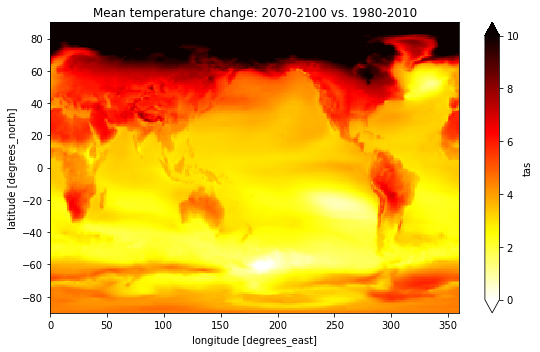

In [56]:
tas_30yr_diff.mean('month').tas.plot(figsize=[8,5], cmap = 'hot_r', 
                                     vmin = 0, vmax = 10)
plt.title('Mean temperature change: 2070-2100 vs. 1980-2010')
plt.tight_layout()

In [57]:
tas_avg_hist_yr = tas_avg_hist.mean('month')
tas_change_yr = ds_ssp585_sel.groupby('time.year').mean('time')
tas_change_yr = tas_change_yr - tas_avg_hist_yr

In [58]:
tas_change_yr_rolling5 = tas_change_yr.rolling(year=5,center=True).mean().dropna('year').tas
# Make a directory to save all the figures there:
if not os.path.exists('./Figures_ssp585/'):
    os.makedirs('./Figures_ssp585/')

for i in range(len(tas_change_yr_rolling5)):
    dataplot = tas_change_yr_rolling5[i,:,:]
    # Convert 0:360 to -180:180 :
    dataplot = dataplot.assign_coords(lon = dataplot.lon - (dataplot.lon > 180)*360)
    dataplot = dataplot.sortby('lon', ascending=True)

    fig = plt.figure(figsize=[9,5], facecolor='w')
    # Adjust plot area (I find these by try and error until I get what I want)
    plt.subplots_adjust(left=0.075, right=0.895, bottom=0.1, top=0.93)
    plt.pcolormesh(dataplot.lon, dataplot.lat, dataplot, cmap='plasma', vmin=0, vmax=12)
    plt.title(f'Near-surface air temperature change: {model} ssp585, {dataplot.year.values} vs. 1980-2010',
              fontsize = 14)
    plt.ylabel('Latitude', fontsize = 12)
    plt.xlabel('Longitude', fontsize = 12)
    # Add colorbar:
    cax = fig.add_axes([0.91, 0.12, 0.02, 0.8])
    cb = plt.colorbar(cax=cax, orientation='vertical', extend = 'max')
    cb.ax.tick_params(labelsize=11)
    cb.set_label(label='Temperature Change (°C)', color = 'k', size=13)
    # Save and close figure:
    plt.savefig(f'./Figures_ssp585/Fig_tasChange_{dataplot.year.values}.png', 
                format = 'png', dpi=200)
    plt.close()

In [59]:
!pip install opencv-python

import cv2
import glob

In [60]:
files = glob.glob(f'./Figures_ssp585/Fig_tasChange*.png')
files.sort()

In [61]:
img_array = []
for filename in files:
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
fps = 4
out = cv2.VideoWriter(f'Vid_tasChange_ssp585.mp4',cv2.VideoWriter_fourcc(*'MP4V'), 4, size)
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

In [62]:
left = 236
right = 240
bottom = 42
top = 49

tas_NW_yr_hist = ds_hist_sel.isel(lat = (ds_hist_sel.lat>=bottom) & (ds_hist_sel.lat<=top),
                   lon = (ds_hist_sel.lon>=left) & (ds_hist_sel.lon<=right),
                   ).mean(['lat','lon']).drop(['bnds', 'height', 'time_bnds'])
tas_NW_yr_ssp585 = ds_ssp585_sel.isel(lat = (ds_ssp585_sel.lat>=bottom) & (ds_ssp585_sel.lat<=top),
                   lon = (ds_ssp585_sel.lon>=left) & (ds_ssp585_sel.lon<=right),
                   ).mean(['lat','lon']).drop(['bnds', 'height', 'time_bnds'])

In [63]:
tas_NW_yr_hist = ds_hist_sel.isel(lat = (ds_hist_sel.lat>=bottom) & (ds_hist_sel.lat<=top),
                   lon = (ds_hist_sel.lon>=left) & (ds_hist_sel.lon<=right),
                   ).mean(['lat','lon']).drop(['bnds', 'height', 'time_bnds'])
tas_NW_yr_ssp585 = ds_ssp585_sel.isel(lat = (ds_ssp585_sel.lat>=bottom) & (ds_ssp585_sel.lat<=top),
                   lon = (ds_ssp585_sel.lon>=left) & (ds_ssp585_sel.lon<=right),
                   ).mean(['lat','lon']).drop(['bnds', 'height', 'time_bnds'])

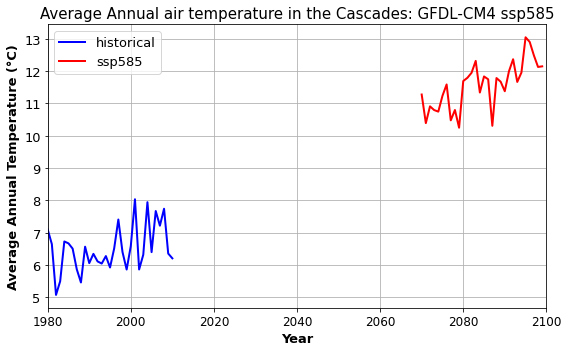

In [64]:
plt.figure(figsize=[8,5],)
(tas_NW_yr_hist.groupby('time.year').mean().tas-273.15).plot(
    label='historical', color='b', linewidth=2)
(tas_NW_yr_ssp585.groupby('time.year').mean().tas-273.15).plot(
    label='ssp585', color='r', linewidth=2)
plt.grid()
plt.xlim([1980,2100])
plt.legend(fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=13)
plt.ylabel('Average Annual Temperature (°C)', fontsize=13, fontweight='bold')
plt.xlabel('Year', fontsize=13, fontweight='bold')
plt.title(f'Average Annual air temperature in the Cascades: {model} ssp585',
          fontsize=15)

plt.tight_layout()